In [1]:
# paquetes necesarios
%matplotlib inline
import time
start_time = time.time()
import matplotlib.pyplot as plt
import numpy as np # implementacion vectorizadas de listas
import pandas as pd #manedo de datasets
from sklearn.model_selection import train_test_split #division aleatoria
from sklearn.neighbors import KNeighborsClassifier # metodo knn
from sklearn.svm import SVC # metodo SVM
from sklearn.ensemble import RandomForestClassifier #metodo Random Forest
from sklearn.linear_model import LogisticRegression # modelo de regresion losgistica regularizada
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV # implementacion de cross validation 

/home/fou/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/fou/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/fou/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  Deprec

El archivo <code> meta4momentos.csv </code> son las features de nuestro proceso ejecutado en Mathematica

In [2]:
datos = pd.read_csv('/home/fou/Desktop/Magia/meta4momentos.csv', header=None)
datos.columns = [ 'X' + str(i) for i in datos.columns] 
del datos['X0'] 
y = datos['X1'] # Respaldamos nuestra variable de interes
y = y > 0
del datos['X1']
del datos['X2']
y

0        True
1       False
2        True
3        True
4        True
5       False
6       False
7       False
8        True
9       False
10      False
11       True
12       True
13      False
14      False
15      False
16       True
17       True
18       True
19       True
20      False
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1170     True
1171     True
1172     True
1173     True
1174     True
1175     True
1176     True
1177     True
1178     True
1179     True
1180     True
1181     True
1182     True
1183     True
1184     True
1185     True
1186     True
1187     True
1188     True
1189     True
1190     True
1191     True
1192     True
1193     True
1194     True
1195     True
1196     True
1197     True
1198     True
1199     True
Name: X1, Length: 1200, dtype: bool

En todos nuestros experimentos manejamos el 70% de nuestros datos como conjunto de Train

In [3]:
train, test, y_train, y_test = train_test_split(datos, y, test_size=0.3, random_state=0) # es importante este detalle para que todos tengamos el mismo resultado


Construimos una función que realice una busqueda por grid y cross validation sobre los hiperparámetros de nuestros claasificadores.

In [4]:
def grid_search():
    # funcion para encontrar los mejores hiperparametros sobre un grid y usando cross validation, paralizada
    # Entradas: ninguna
    # Salidas: objeto con los estadisticos de la busqueda, incluye el mejor modelo asi como sus parametros
        # inicializacion de los clasificadores
    pipeline1  = Pipeline([ ('classifier', RandomForestClassifier(random_state = 42))])
    pipeline2 = Pipeline(( ('clf', KNeighborsClassifier()), ))
    pipeline3 = Pipeline(( ('clf', SVC()), ))
    pipeline4 = Pipeline((('logistic', LogisticRegression()),))
        # definicion dle espacio de busqueda de los parametros
    parameters1 = { 'classifier__n_estimators': [i+1 for i in range(round(len(train))) if i % 10 == 1] }
    parameters2 = {'clf__n_neighbors': [ i+1 for i in range(round(len(train)**.5)) if i % 2 == 1 ]}
    parameters3 = { 'clf__C': [0.01, 0.1, .3,  .7, 9.0], 'clf__kernel': ['rbf'], 'clf__gamma': [0.01, 0.1, 9.0]}
    parameters4= { 'logistic__C' :  [ np.exp(i) for i in  range(-6, 25) ]}
    pars = [parameters1, parameters2, parameters3, parameters4]
    pips = [pipeline1, pipeline2, pipeline3, pipeline4]
    print ("starting Gridsearch")
        # se realiza la busqueda exhaustiva validando con cv
    for i in range(len(pars)):
        gs = GridSearchCV(pips[i], pars[i], verbose=1, refit=True, cv=50, n_jobs=-1)
        gs = gs.fit(np.matrix(train), y_train)
        print ("finished Gridsearch")
        print (gs.best_score_)
    return(gs)

In [5]:
modelo =  grid_search() #ejecutamos la busqueda
print(modelo.best_estimator_)
y_hat = modelo.predict(np.matrix(test))

starting Gridsearch
Fitting 50 folds for each of 84 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 716 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 966 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1766 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2316 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2966 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 3716 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed: 21.4min finished


finished Gridsearch
0.6904761904761905
Fitting 50 folds for each of 14 candidates, totalling 700 fits
finished Gridsearch
0.6297619047619047
Fitting 50 folds for each of 15 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.0s


finished Gridsearch
0.6678571428571428
Fitting 50 folds for each of 31 candidates, totalling 1550 fits


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 1288 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 1550 out of 1550 | elapsed:  1.6min finished


finished Gridsearch
0.6547619047619048
Pipeline(memory=None,
     steps=[('logistic', LogisticRegression(C=442413.3920089205, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])


Calculo de la matriz de confusión

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_hat)) # reporte con la presicion por clase
print(confusion_matrix(y_test, y_hat))

             precision    recall  f1-score   support

      False       0.63      0.57      0.60       169
       True       0.65      0.70      0.68       191

avg / total       0.64      0.64      0.64       360

[[ 97  72]
 [ 57 134]]


In [7]:
confusion_matrix(y_test, y_hat).ravel() 

array([ 97,  72,  57, 134])

In [8]:
print("--- %s seconds ---" % (time.time() - start_time))


--- 1395.7107253074646 seconds ---


In [9]:
modelo.best_estimator_ # el mejor clasificador resulto ser la regresión logistica

Pipeline(memory=None,
     steps=[('logistic', LogisticRegression(C=442413.3920089205, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [10]:
hiperp = modelo.best_params_['logistic__C']
hiperp

442413.3920089205

In [11]:
final = LogisticRegression(C=hiperp) #entranamos el modelo con todos los datos para dar interpretación de las features
final.fit(datos, y)


LogisticRegression(C=442413.3920089205, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Text(0.5,1,'Categoria 0, valor del coeficiente estimado')

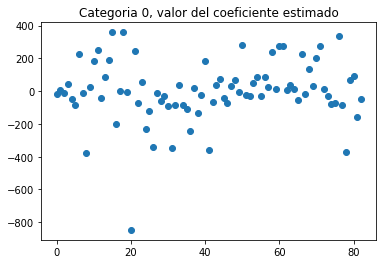

In [12]:
plt.scatter( [i for i in range(83)] ,  final.coef_[0])
plt.title('Categoria 0, valor del coeficiente estimado' )

In [15]:
datos.columns[ np.abs(final.coef_[0]) > 200]

Index(['X9', 'X11', 'X14', 'X18', 'X21', 'X23', 'X24', 'X27', 'X29', 'X34',
       'X39', 'X44', 'X53', 'X61', 'X63', 'X64', 'X69', 'X73', 'X74', 'X79',
       'X81'],
      dtype='object')